## 패키지 설치

In [2]:
random_state = 0
Survived = 'Survived'

In [3]:
!pip install pandas
!pip install scikit-learn
!pip install seaborn

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [5]:
import src.preprocessing.label as label

import importlib

importlib.reload(label)

<module 'src.preprocessing.label' from '/Users/deptno/workspace/kaggle/titanic/competition/titanic/src/preprocessing/label.py'>

In [6]:
train = pd.read_csv('train.csv')

In [7]:
train_input, test_input, train_target, test_target = train_test_split(train.drop(Survived, axis=1), train[Survived],
                                                                      test_size=0.2)

In [8]:
train_input.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 802 to 678
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   Name         712 non-null    object 
 3   Sex          712 non-null    object 
 4   Age          575 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Ticket       712 non-null    object 
 8   Fare         712 non-null    float64
 9   Cabin        160 non-null    object 
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 66.8+ KB


In [9]:
train_input.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,575.000000,712.000000,712.000000,712.000000
mean,448.793539,2.306180,29.618557,0.512640,0.380618,31.094258
std,257.333636,0.836284,14.526131,1.080375,0.804219,47.384562
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,232.750000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,457.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,669.250000,3.000000,38.000000,1.000000,0.000000,30.500000
max,890.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train_input

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
802,803,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0000,B96 B98,S
10,11,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
38,39,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,NaN,S
635,636,2,"Davis, Miss. Mary",female,28.0,0,0,237668,13.0000,NaN,S
791,792,2,"Gaskell, Mr. Alfred",male,16.0,0,0,239865,26.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
838,839,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S
375,376,1,"Meyer, Mrs. Edgar Joseph (Leila Saks)",female,NaN,1,0,PC 17604,82.1708,NaN,C
332,333,1,"Graham, Mr. George Edward",male,38.0,0,1,PC 17582,153.4625,C91,S
616,617,3,"Danbom, Mr. Ernst Gilbert",male,34.0,1,1,347080,14.4000,NaN,S


In [11]:
cat_features = [
    'Pclass',
    'Sex',
    'Embarked'
]

## feature selection

In [12]:
train_input_v1 = train_input.copy()
test_input_v1 = test_input.copy()

In [13]:
# Label Encoder 적용
train_input_v1,_ = label.apply(train_input_v1, 'Name', lambda prop: f'{prop}Id')
train_input_v1,_ = label.apply(train_input_v1, 'Sex', lambda prop: f'Label_{prop}')
train_input_v1,_ = label.apply(train_input_v1, 'Embarked', lambda prop: f'Label_{prop}')

test_input_v1, _ = label.apply(test_input_v1, 'Name', lambda prop: f'{prop}Id')
test_input_v1, _ = label.apply(test_input_v1, 'Sex', lambda prop: f'Label_{prop}')
test_input_v1, _ = label.apply(test_input_v1, 'Embarked', lambda prop: f'Label_{prop}')

### Name, PassengerId 가 1:1 관계인지 확인
- Drop `Name`. If `PassengerId` 가 1:1 인 경우 Name
  - label encoding 후에 `drop_duplicates()` 후에 갯수가 같다면 동일한 것으로 간주

In [14]:
print(len(train_input['Name'].unique()))
print(len(train_input['PassengerId'].unique()))

712
712


In [15]:
dropped = train_input_v1[['PassengerId', 'NameId']].drop_duplicates()

In [16]:
# valid they are 1:1 relationship
train_input_v1[['PassengerId', 'NameId']].shape[0] == dropped.shape[0]

True

In [17]:
# ticket, carbin 은 일단 제거
# NameId 는 불필요 하므로 제거
# Sex, Embarked 는 Label* 로 변경되었으므로 제거
train_input_v1.drop(['NameId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
test_input_v1.drop(['NameId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [18]:
display(train_input_v1)
display(test_input_v1)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Label_Sex,Label_Embarked
802,803,1,11.0,1,2,120.0000,1,2
10,11,3,4.0,1,1,16.7000,0,2
38,39,3,18.0,2,0,18.0000,0,2
635,636,2,28.0,0,0,13.0000,0,2
791,792,2,16.0,0,0,26.0000,1,2
...,...,...,...,...,...,...,...,...
838,839,3,32.0,0,0,56.4958,1,2
375,376,1,NaN,1,0,82.1708,0,0
332,333,1,38.0,0,1,153.4625,1,2
616,617,3,34.0,1,1,14.4000,1,2


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Label_Sex,Label_Embarked
309,310,1,30.0,0,0,56.9292,0,0
444,445,3,NaN,0,0,8.1125,1,2
93,94,3,26.0,1,2,20.5750,1,2
354,355,3,NaN,0,0,7.2250,1,0
591,592,1,52.0,1,0,78.2667,0,0
...,...,...,...,...,...,...,...,...
369,370,1,24.0,0,0,69.3000,0,0
772,773,2,57.0,0,0,10.5000,0,2
293,294,3,24.0,0,0,8.8500,0,2
522,523,3,NaN,0,0,7.2250,1,0


In [19]:
ticket_u = train_input['Ticket'].unique()

## 변수간 correlation 확인

In [20]:
threshold = np.nan

<Axes: >

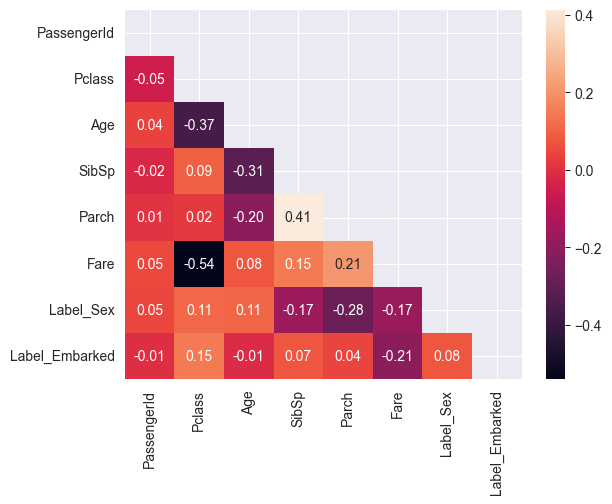

In [21]:
corr_v1 = train_input_v1.corr()
mask = np.triu(np.ones_like(corr_v1, dtype=bool))
mask = mask | (np.abs(corr_v1) < threshold)
display(sns.heatmap(corr_v1, annot=True, mask=mask, fmt='.2f'))

<Axes: >

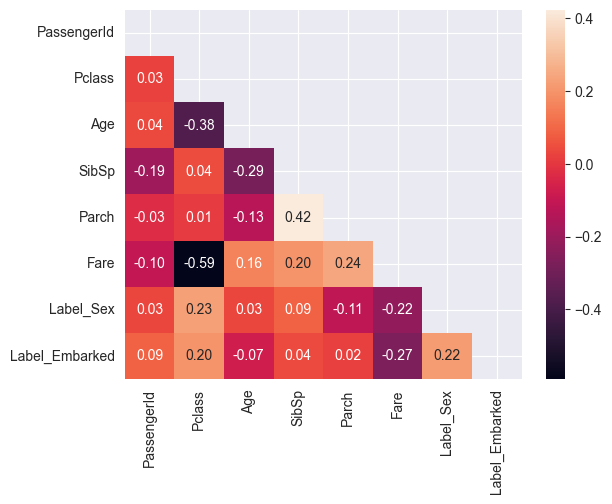

In [22]:
corr_test_v1 = test_input_v1.corr()
mask_test = np.triu(np.ones_like(corr_test_v1, dtype=bool))
mask_test = mask_test | (np.abs(corr_test_v1) < threshold)
display(sns.heatmap(corr_test_v1, annot=True, mask=mask_test, fmt='.2f'))

## 모델 생성

In [23]:
rf = RandomForest = RandomForestClassifier(n_estimators=10, random_state=0, max_depth=8)

In [24]:
rf.fit(train_input_v1, train_target)

RandomForestClassifier(max_depth=8, n_estimators=10, random_state=0)

In [25]:
rf.score(train_input_v1, train_target)

0.9101123595505618

In [26]:
rf.score(test_input_v1, test_target)

0.8156424581005587

## 과대 적합

### max_depth 테스트

In [27]:
score_train_input_v1 = []
score_test_input_v1 = []
get_depth_range = lambda: range(1, 10)
for d in get_depth_range():
    rf = RandomForestClassifier(n_estimators=100, random_state=random_state, max_depth=d)
    rf.fit(train_input_v1, train_target)
    score_train_input_v1.append(rf.score(train_input_v1, train_target))
    score_test_input_v1.append(rf.score(test_input_v1, test_target))


In [28]:
score_v1_df = pd.DataFrame({
    'train': score_train_input_v1,
    'test': score_test_input_v1,
})
display(score_v1_df)

,train,test
0,0.748596,0.782123
1,0.792135,0.821229
2,0.830056,0.849162
3,0.849719,0.860335
4,0.866573,0.865922
5,0.884831,0.849162
6,0.915730,0.854749
7,0.931180,0.849162
8,0.950843,0.843575


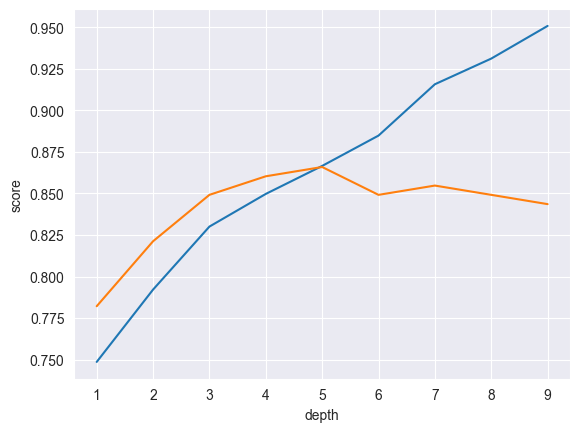

In [29]:
plt.plot(get_depth_range(), score_train_input_v1, label='train')
plt.plot(get_depth_range(), score_test_input_v1, label='test')
plt.xlabel('depth')
plt.ylabel('score')
plt.show()

In [30]:
## generate output
test = pd.read_csv('test.csv')
print(test.shape)
test, _ = label.apply(test, 'Name', lambda prop: f'{prop}Id')
test, _ = label.apply(test, 'Sex', lambda prop: f'Label_{prop}')
test, _ = label.apply(test, 'Embarked', lambda prop: f'Label_{prop}')
test.drop(['NameId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

# 테스트 결과 max_depth = 6
rf = RandomForestClassifier(n_estimators=100, random_state=random_state, max_depth=6)
rf.fit(train_input_v1, train_target)
test_predict = rf.predict(test)

(418, 11)


In [31]:
output_df = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': test_predict,
})
display(train_input_v1.shape)
display(test_input_v1.shape)
display(test.shape)


(712, 8)

(179, 8)

(418, 8)

In [32]:
output_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [33]:
output_df.to_csv('output.csv', index=False)